In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier


In [31]:
PATH ='dataset/'

In [32]:
train = pd.read_csv(f'{PATH}train.csv')
test = pd.read_csv(f'{PATH}test.csv')

## fuction for splitting the valid and train dataset from total train images

This is basically done to check for overfitting of the training images.

In [33]:
def split_data(tr_data,n):
    return tr_data.iloc[:len(tr_data)-n],tr_data.iloc[len(tr_data)-n:]

### Drop the label from the train data frame

In [34]:
label = train['label']
train = train.drop('label',1)

### Split the dataset for training and validation with same size as test

In [6]:
n = len(test)
X_train,X_valid = split_data(train,n)
Y_train,Y_valid = split_data(label,n)

In [8]:
X_train.shape

(14000, 784)

### Visualize the data

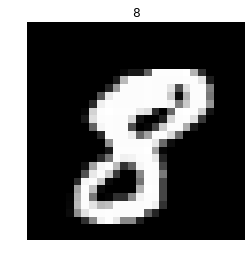

In [7]:
img_no = 10
img = X_train.iloc[img_no].values.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title(Y_train.iloc[img_no])
plt.show()

### Random Forest Regressor:

In [ ]:
n_ests = [1,5,10,25,50,100,500]
result = []
for n in n_ests:
    RF_model = RandomForestRegressor(n_estimators=n,criterion='mse')
    RF_model.fit(X_train,Y_train)
    result.append(RF_model.score(X_valid,Y_valid))

### plot for different values of estimators

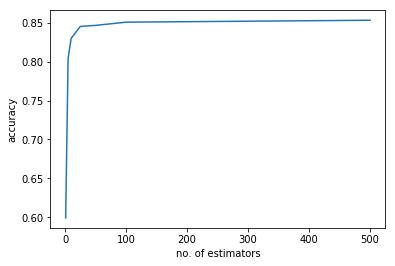

In [10]:
plt.plot(n_ests,result)
plt.xlabel('no. of estimators')
plt.ylabel('accuracy')
plt.show()

In [11]:
result

[0.5992193675459274,
 0.8042443734770806,
 0.829918518808128,
 0.8452424832618076,
 0.8465956113143637,
 0.8507187464907648,
 0.8531992126110474]

### Save the result

In [12]:
results = np.floor(np.array(RF_model.predict(test))).astype(int)

In [16]:
np.savetxt('results.csv',
          np.c_[range(1,len(test) + 1),results],
          delimiter=',',
            header='ImageId,Label',
           comments='',
          fmt='%d')

#### Kaggle Accuracy : 48.5

### Random forest with few more parameters:

In [18]:
m_f = ['sqrt','log2']
result = []
for f in m_f:
    Rf_model = RandomForestRegressor(n_estimators=500,criterion='mse',max_features=f)
    Rf_model.fit(X_train,Y_train)
    result.append(Rf_model.score(X_valid,Y_valid))

### Increasing the size of training data

In [9]:
n = 12000
X_train,X_valid = split_data(train,n)
Y_train,Y_valid = split_data(label,n)

In [19]:
Rf_model = RandomForestRegressor(n_estimators=500,criterion='mse',max_features='sqrt')
Rf_model.fit(X_train,Y_train)
Rf_model.score(X_valid,Y_valid)

0.8837488927255566

In [12]:
results = np.floor(np.array(Rf_model.predict(test))).astype(int)

In [13]:
np.savetxt('result_88.csv',
          np.c_[range(1,len(test) + 1),results],
          delimiter=',',
            header='ImageId,Label',
           comments='',
          fmt='%d')

#### Kaggle Accuracy : 48.414

In [15]:
Rf_model = RandomForestRegressor(n_estimators=100,criterion='mse',max_features='sqrt',oob_score=True)
Rf_model.fit(X_train,Y_train)
Rf_model.score(X_valid,Y_valid)

0.8819322517612671

### RF Classifier

In [8]:
RF_wo_split = RandomForestClassifier(n_estimators =100,max_features='sqrt',n_jobs=1)
RF_wo_split.fit(X_train,Y_train)
RF_wo_split.score(X_valid,Y_valid)

0.9551785714285714

In [10]:
RF_wo_split_12 = RandomForestClassifier(n_estimators =100,max_features='sqrt',n_jobs=1)
RF_wo_split_12.fit(X_train,Y_train)
RF_wo_split_12.score(X_valid,Y_valid)

0.9655833333333333

In [17]:
feature_imp = pd.Series(RF_wo_split_12.feature_importances_,index=train.columns.values).sort_values(ascending=False)

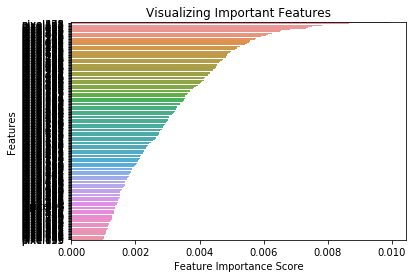

In [31]:
sb.barplot(x=feature_imp[0:301],y=feature_imp.index[0:301])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### take only top 300 features for training

In [44]:
imp_fea = feature_imp.index[0:301]

In [45]:
train_imp = train[imp_fea]

In [46]:
n = 12000
X_train,X_valid = split_data(train_imp,n)
Y_train,Y_valid = split_data(label,n)

In [47]:
RF_wo_split_12imp = RandomForestClassifier(n_estimators =100,max_features='sqrt',n_jobs=1)
RF_wo_split_12imp.fit(X_train,Y_train)
RF_wo_split_12imp.score(X_valid,Y_valid)

0.9643333333333334

In [48]:
n = len(test)
X_train,X_valid = split_data(train_imp,n)
Y_train,Y_valid = split_data(label,n)

In [ ]:
RF_wo_split_12impt = RandomForestClassifier(n_estimators =100,max_features='sqrt',n_jobs=1)
RF_wo_split_12impt.fit(X_train,Y_train)
RF_wo_split_12impt.score(X_valid,Y_valid)

In [8]:
results = np.floor(np.array(RF_wo_split.predict(test))).astype(int)

In [ ]:
np.savetxt('result_RFC.csv',
          np.c_[range(1,len(test) + 1),results],
          delimiter=',',
            header='ImageId,Label',
           comments='',
          fmt='%d')

#### Kaggle Accuracy : 95.228

### SVC

In [7]:
SV_Class = SVC()
SV_Class.fit(X_train,Y_train)
SV_Class.score(X_valid,Y_valid)x

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.11103571428571428

In [7]:
PCA_a = PCA(n_components=50)
PCA_a.fit(X_train)
tr_X_tr = PCA_a.transform(X_train)
tr_X_va = PCA_a.transform(X_valid)
tr_X_test = PCA_a.transform(test)

In [8]:
RF_wo_split = RandomForestClassifier(n_estimators =100,max_features='sqrt',n_jobs=1)
RF_wo_split.fit(tr_X_tr,Y_train)
RF_wo_split.score(tr_X_va,Y_valid)

0.936

In [12]:
SV_Class = SVC()
SV_Class.fit(tr_X_tr,Y_train)
SV_Class.score(tr_X_va,Y_valid)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.11103571428571428

In [9]:
result = []
nn = [1,2,3,4,5,10,15,20]
for n in nn:
    KN_C = KNeighborsClassifier(n_jobs=1,n_neighbors=n);
    KN_C.fit(tr_X_tr,Y_train)
    result.append(KN_C.score(tr_X_va,Y_valid))

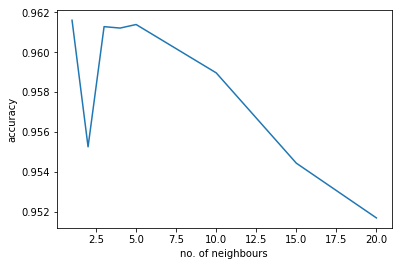

In [10]:
plt.plot(nn,result)
plt.xlabel('no. of neighbours')
plt.ylabel('accuracy')
plt.show()

In [12]:
KN_C = KNeighborsClassifier(n_jobs=1,n_neighbors=1);
KN_C.fit(tr_X_tr,Y_train)
result.append(KN_C.score(tr_X_va,Y_valid))

In [13]:
results = RF_wo_split.predict(tr_X_test)

In [14]:
results.shape

(28000,)

In [15]:
np.savetxt('result_PC_.csv',
          np.c_[range(1,len(test) + 1),results],
          delimiter=',',
            header='ImageId,Label',
           comments='',
          fmt='%d')

#### Kaggle Accuracy : 93.5

## Deep Learning

In [35]:
import keras
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop

In [36]:
num_classes = 10


In [37]:
n = 12800
X_train,X_valid = split_data(train,n)
Y_train,Y_valid = split_data(label,n)



#one hot encoding
label1 = keras.utils.to_categorical(label, num_classes)
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_valid = keras.utils.to_categorical(Y_valid, num_classes)

In [ ]:
#Normalization
X_train /= 255
X_valid /=255
test /=255

In [10]:
first_layer_size = 144
model = Sequential()
model.add(Dense(first_layer_size, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 144)               113040    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                9280      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 125,786
Trainable params: 125,786
Non-trainable params: 0
_________________________________________________________________


### Compiling a Model

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### Training

In [12]:
# Write the Training input and output variables, size of the batch, number of epochs
epochs = 200
batch_size = 128
history = model.fit(X_train,Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


Epoch 1/200
37000/37000 [==============================] - 3s 82us/step - loss: 0.4577 - acc: 0.8665
Epoch 2/200
37000/37000 [==============================] - 3s 76us/step - loss: 0.1752 - acc: 0.9476
Epoch 3/200
37000/37000 [==============================] - 3s 75us/step - loss: 0.1213 - acc: 0.9635
Epoch 4/200
37000/37000 [==============================] - 3s 77us/step - loss: 0.0932 - acc: 0.9718
Epoch 5/200
37000/37000 [==============================] - 3s 78us/step - loss: 0.0742 - acc: 0.9765
Epoch 6/200
37000/37000 [==============================] - 3s 80us/step - loss: 0.0602 - acc: 0.9820
Epoch 7/200
37000/37000 [==============================] - 3s 74us/step - loss: 0.0485 - acc: 0.9848
Epoch 8/200
37000/37000 [==============================] - 3s 74us/step - loss: 0.0395 - acc: 0.9880
Epoch 9/200
37000/37000 [==============================] - 3s 75us/step - loss: 0.0322 - acc: 0.9896
Epoch 10/200
37000/37000 [==============================] - 3s 77us/step - loss: 0.0275 - a

37000/37000 [==============================] - 3s 77us/step - loss: 0.0024 - acc: 0.9995
Epoch 161/200
37000/37000 [==============================] - 3s 75us/step - loss: 0.0026 - acc: 0.9996
Epoch 162/200
37000/37000 [==============================] - 3s 75us/step - loss: 0.0017 - acc: 0.9998
Epoch 163/200
37000/37000 [==============================] - 3s 73us/step - loss: 0.0016 - acc: 0.9997
Epoch 164/200
37000/37000 [==============================] - 3s 71us/step - loss: 0.0024 - acc: 0.9996
Epoch 165/200
37000/37000 [==============================] - 3s 69us/step - loss: 0.0028 - acc: 0.9995
Epoch 166/200
37000/37000 [==============================] - 3s 71us/step - loss: 0.0036 - acc: 0.9995
Epoch 167/200
37000/37000 [==============================] - 3s 75us/step - loss: 0.0017 - acc: 0.9998
Epoch 168/200
37000/37000 [==============================] - 3s 72us/step - loss: 0.0029 - acc: 0.9996
Epoch 169/200
37000/37000 [==============================] - 3s 76us/step - loss: 0.003

### Testing

In [13]:
# Write the testing input and output variables
score = model.evaluate(X_valid, Y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.316402275296855
Test accuracy: 0.976


In [15]:
prediction = model.predict(test)
prediction

array([[0.0649393 , 0.13303621, 0.16530864, ..., 0.03479178, 0.07656142,
        0.05339568],
       [0.06454037, 0.1279196 , 0.16878247, ..., 0.03506781, 0.0785181 ,
        0.05400655],
       [0.0628479 , 0.12590176, 0.16568094, ..., 0.03427208, 0.08025961,
        0.05196222],
       ...,
       [0.06263509, 0.12380597, 0.1689161 , ..., 0.03579636, 0.07838753,
        0.05441868],
       [0.06560657, 0.1263336 , 0.16999875, ..., 0.03286351, 0.08000905,
        0.05399113],
       [0.06509314, 0.1333632 , 0.1651632 , ..., 0.03426728, 0.0776182 ,
        0.0531764 ]], dtype=float32)

In [16]:
result = np.argmax(prediction,axis=1)

In [17]:
np.savetxt('result_DL_200_2.csv',
          np.c_[range(1,len(test) + 1),result],
          delimiter=',',
            header='ImageId,Label',
           comments='',
          fmt='%d')

#### Kaggle Accuracy : 9.614 so you can see the overfitting problem here, machine got 99.98 in training data where as very poor in test data

### CNN

In [38]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.xception import Xception
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

#### Building a model

In [39]:
# input image dimensions
img_rows, img_cols = 28, 28
X_train = X_train.as_matrix()
X_valid = X_valid.as_matrix()
test = test.as_matrix()
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_valid = X_valid.reshape(X_valid.shape[0], 1, img_rows, img_cols)
    test =  test.reshape(test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)
    test = test.reshape(test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_train /= 255
X_valid /= 255
# test /= 255


In [40]:
test = test.astype('float32')
test /= 255

In [45]:
model = Sequential()
model.add(Conv2D(60, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(52, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 60)        600       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 52)        28132     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 52)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        7504      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
__________

In [46]:
batch_size =128
epochs = 50

In [47]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [25]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [51]:
model1 = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(X_valid, Y_valid))

Train on 29200 samples, validate on 12800 samples
Epoch 1/10
29200/29200 [==============================] - 177s 6ms/step - loss: 0.0468 - acc: 0.9846 - val_loss: 0.0347 - val_acc: 0.9899
Epoch 2/10
29200/29200 [==============================] - 178s 6ms/step - loss: 0.0472 - acc: 0.9849 - val_loss: 0.0341 - val_acc: 0.9901
Epoch 3/10
29200/29200 [==============================] - 174s 6ms/step - loss: 0.0443 - acc: 0.9863 - val_loss: 0.0345 - val_acc: 0.9903
Epoch 4/10
29200/29200 [==============================] - 172s 6ms/step - loss: 0.0459 - acc: 0.9859 - val_loss: 0.0311 - val_acc: 0.9916
Epoch 5/10
29200/29200 [==============================] - 179s 6ms/step - loss: 0.0451 - acc: 0.9851 - val_loss: 0.0338 - val_acc: 0.9909
Epoch 6/10
29200/29200 [==============================] - 181s 6ms/step - loss: 0.0409 - acc: 0.9865 - val_loss: 0.0383 - val_acc: 0.9880
Epoch 7/10
29200/29200 [==============================] - 182s 6ms/step - loss: 0.0429 - acc: 0.9862 - val_loss: 0.0337 - 

In [16]:
score = model.evaluate(X_valid, Y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.048429201680528756
Test accuracy: 0.9864444444444445


In [18]:
test
prediction = model.predict(test)
prediction

array([[3.5423140e-11, 5.2639473e-11, 1.0000000e+00, ..., 3.3016221e-08,
        4.0689610e-10, 1.6608966e-17],
       [9.9999964e-01, 2.9647921e-15, 7.2439502e-12, ..., 4.4312408e-11,
        4.4297241e-09, 4.7521103e-09],
       [1.0909784e-08, 3.3792379e-08, 1.1246973e-07, ..., 6.5766194e-06,
        2.9091959e-04, 9.8566979e-01],
       ...,
       [3.2445427e-18, 2.1526602e-13, 1.1860770e-11, ..., 7.4145345e-10,
        7.0344819e-14, 1.6667405e-09],
       [3.7013278e-11, 1.6623244e-12, 7.3022643e-11, ..., 3.0443812e-06,
        3.8907974e-08, 9.9981731e-01],
       [1.3704390e-09, 8.4172183e-11, 9.9999976e-01, ..., 7.9215823e-08,
        7.0015680e-08, 1.4382923e-15]], dtype=float32)

In [60]:
result = np.argmax(prediction,axis=1)

### Data augmentation

In [52]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [53]:
model1.model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = 10, validation_data = (X_valid,Y_valid),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
228/228 [==============================] - 175s 769ms/step - loss: 0.2688 - acc: 0.9171 - val_loss: 0.0313 - val_acc: 0.9912
Epoch 2/10
228/228 [==============================] - 179s 785ms/step - loss: 0.2090 - acc: 0.9377 - val_loss: 0.0343 - val_acc: 0.9901
Epoch 3/10
228/228 [==============================] - 176s 773ms/step - loss: 0.1929 - acc: 0.9414 - val_loss: 0.0355 - val_acc: 0.9899
Epoch 4/10
228/228 [==============================] - 179s 785ms/step - loss: 0.1780 - acc: 0.9446 - val_loss: 0.0324 - val_acc: 0.9905
Epoch 5/10
228/228 [==============================] - 174s 764ms/step - loss: 0.1682 - acc: 0.9503 - val_loss: 0.0461 - val_acc: 0.9866
Epoch 6/10
228/228 [==============================] - 174s 765ms/step - loss: 0.1610 - acc: 0.9520 - val_loss: 0.0321 - val_acc: 0.9912
Epoch 7/10
228/228 [==============================] - 175s 766ms/step - loss: 0.1534 - acc: 0.9532 - val_loss: 0.0365 - val_acc: 0.9888
Epoch 8/10
228/228 [============================

In [19]:
prediction = model.predict(test)

In [20]:
result = np.argmax(prediction,axis=1)

In [21]:
np.savetxt('result_DLCNN_AUG_L40.csv',
          np.c_[range(1,len(test) + 1),result],
          delimiter=',',
            header='ImageId,Label',
           comments='',
          fmt='%d')

#### Kaggle Accuracy : 99.285